In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib notebook

In [72]:
file = 'data/spb-rentals-2020-feb'
df = pd.read_csv(file + '.csv', encoding='utf-16', delimiter='\t')
df = df.drop_duplicates()
df.head()

,ID,Дата,Тип жилья,Тип дома,Год постройки,Этаж,Адрес,X,Y,Станция метро,"Расстояние до метро, м","Общая площадь, м","Площадь кухни, м","Жилая площадь, м","Аренда, руб./мес.","Ком. платежи, руб./мес.","Комиссия, %","Комиссия, руб.","Общий платеж, руб./мес",Описание
0,373307,04.02.2021,студия,Кирпичный,1975 г.п.,6/16 этаж,"Наличная ул., 51",59.951063,30.234309,Приморская,280,20.0,NaN,NaN,18000,2500.0,50,9000.0,20500,"\r\n Просторна, тёплая квартира..."
1,373306,04.02.2021,студия,Кирпичный,2011 г.п.,16/17 этаж,"Ленинский пр., 84к2",59.858804,30.199274,Ленинский пр.,4010,30.0,2.0,NaN,19000,2000.0,50,9500.0,21000,\r\n Отличная квартира-студия н...
2,373288,04.02.2021,студия,Кирпичный,,2/6 этаж,"Подольская ул., 44",59.913083,30.328014,Технологический и-т,620,16.0,NaN,NaN,20000,3000.0,15,3000.0,23000,\r\n Сдам на длительный срок кв...
3,373273,04.02.2021,студия,Кирп.Монолит,,13/24 этаж,"Пулковская ул., 6к2",59.839669,30.350828,Звездная,740,25.0,NaN,NaN,18000,2500.0,60,10800.0,20500,\r\n Сдается квартира-студия в ...
4,373268,04.02.2021,студия,Монолит,,11/14 этаж,"Ковалевская ул., 26к1",59.979444,30.510961,Ладожская,6580,26.0,6.0,NaN,16000,3500.0,60,9600.0,19500,\r\n Сдам квартиру студию в хор...


In [74]:
s = df[df['Тип жилья'] == '2-комн. квартира']
s[(s['Расстояние до метро, м'] > 1600) & (s['Расстояние до метро, м'] <= 1800)].describe()

,ID,X,Y,"Расстояние до метро, м","Общая площадь, м","Площадь кухни, м","Аренда, руб./мес.","Ком. платежи, руб./мес.","Комиссия, %","Комиссия, руб.","Общий платеж, руб./мес"
count,1.700000e+01,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,1.239099e+08,59.948038,30.317384,1730.588235,61.423529,11.294118,35882.352941,4623.529412,48.882353,18052.352941,40505.882353
std,2.750937e+08,0.069890,0.074241,51.047844,11.074719,4.085259,14802.374611,1285.753384,20.432457,10637.561709,15490.540282
min,3.485380e+05,59.847632,30.196446,1610.000000,45.000000,7.000000,20000.000000,2500.000000,0.000000,0.000000,22500.000000
25%,3.687670e+05,59.880375,30.254381,1710.000000,52.200000,8.000000,24000.000000,4000.000000,50.000000,10500.000000,27500.000000
50%,3.726450e+05,59.940661,30.327986,1740.000000,60.000000,10.000000,35000.000000,4500.000000,50.000000,17500.000000,40000.000000
75%,3.731980e+05,60.003696,30.363217,1760.000000,70.000000,12.000000,40000.000000,5000.000000,50.000000,20000.000000,45000.000000
max,7.004373e+08,60.036106,30.472817,1800.000000,85.000000,20.000000,75000.000000,7000.000000,100.000000,37500.000000,82000.000000


In [75]:
file_name = 'data/median-metro'
data = pd.read_csv(file_name + '.txt', encoding='utf-8', delimiter=',')
data

,Метро,студия,1-комн.,2-комн.,3-комн.
0,0–200,23.0,29.0,40.00,52.5
1,200–400,30.0,26.0,37.00,45.0
2,400–600,20.5,24.0,32.50,55.0
3,600–800,23.5,23.0,33.00,50.0
4,800–1000,23.0,23.0,27.00,50.0
5,1000–1200,24.5,23.0,25.50,33.0
6,1200–1400,20.5,20.0,28.00,33.5
7,1400–1600,20.0,22.0,26.00,28.5
8,1600–1800,20.0,20.0,35.00,65.0
9,1800–2000,23.0,19.0,23.00,43.0


In [76]:
sns.set(rc={'axes.facecolor':'#242426'}) # graph facecolor
facecolor = '#242426'
font_color = '#ddd'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
color_0 = '#fdfe66'
color_1 = '#cdf151'
color_2 = '#88c366'
color_3 = '#008066'

<IPython.core.display.Javascript object>


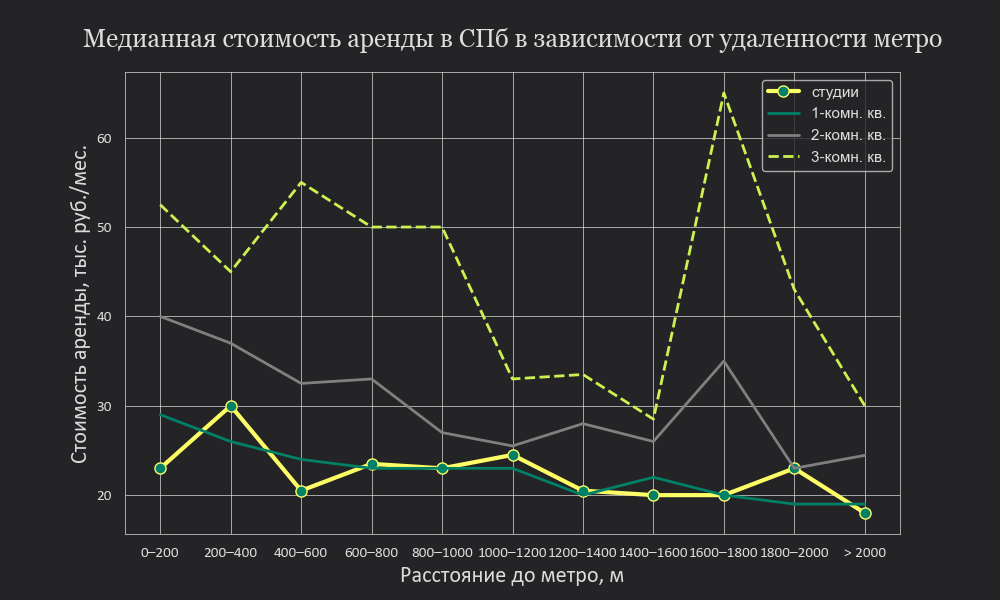

In [78]:
fig, ax = plt.subplots(facecolor=facecolor)
fig.set_size_inches(10, 6)
plt.plot( 'Метро', 'студия', data=data, marker='o', markerfacecolor=color_3, markersize=8, color=color_0, linewidth=3, label='студии')
plt.plot( 'Метро', '1-комн.', data=data, marker='', color=color_3, linewidth=2, label='1-комн. кв.')
plt.plot( 'Метро', '2-комн.', data=data, marker='', color='grey', linewidth=2, label='2-комн. кв.')
plt.plot( 'Метро', '3-комн.', data=data, marker='', color=color_1, linewidth=2, linestyle='dashed', label='3-комн. кв.')

l = plt.legend()
for text in l.get_texts():
    text.set_color(font_color)

ax.set_ylabel('Стоимость аренды, тыс. руб./мес.', color=font_color, fontsize=16, **hfont)
ax.set_xlabel('Расстояние до метро, м', color=font_color, fontsize=16, **hfont)

plt.xticks(color=font_color, **hfont)
plt.yticks(color=font_color, **hfont)

title = 'Медианная стоимость аренды в СПб в зависимости от удаленности метро'
ttl = ax.set_title(title, fontsize=18, pad=18, color=font_color, **csfont)
ttl.set_position([.5, 1])

plt.grid(color=font_color, linestyle='-', linewidth=.5)
mpl.rcParams['axes.linewidth'] = .5
ax.spines['bottom'].set_color(font_color)
ax.spines['top'].set_color(font_color)
ax.spines['left'].set_color(font_color)
ax.spines['right'].set_color(font_color)

In [79]:
filename = 'images/metro-corr'
plt.savefig(filename+'.png', facecolor=facecolor)